## Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from causality.analysis.dataframe import CausalDataFrame

%matplotlib inline

In [4]:
def prep_data(csv_file, pre_dpb_thres):
    df = pd.read_csv(csv_file)
    # filter the DBP pre-onsite values
    if pre_dpb_thres != '':
        tmp = df.loc[df['dbp_pre'] >= pre_dpb_thres]
    else:
        tmp = df
    # Define causal Dataframe for CVP
    cvp_pre = tmp['cvp_pre'].values
    cvp_post = tmp['cvp_post'].values
    peep_pre = tmp['peep_pre'].values
    peep_post = tmp['peep_post'].values
    x = np.append(np.zeros((len(cvp_pre),)), np.ones((len(cvp_post),)), axis=0)
    y = np.append(cvp_pre, cvp_post, axis=0)
    z = np.append(peep_pre, peep_post, axis=0)
    cvp_df = CausalDataFrame({'x': x, 'y': y, 'z': z})
    
    # Define the causal dataframe for DBP
    dbp_pre = tmp['dbp_pre'].values
    dbp_post = tmp['dbp_post'].values
    peep_pre = tmp['peep_pre'].values
    peep_post = tmp['peep_post'].values
    x = np.append(np.zeros((len(dbp_pre),)), np.ones((len(dbp_post),)), axis=0)
    y = np.append(dbp_pre, dbp_post, axis=0)
    z = np.append(peep_pre, peep_post, axis=0)
    dbp_df = CausalDataFrame({'x': x, 'y': y, 'z': z})
    
    # Define the causal dataframe for CVP/DBP ratio
    ratio_pre = tmp['cvp_dbp_pre'].values
    ratio_post = tmp['cvp_dbp_pre'].values
    peep_pre = tmp['peep_pre'].values
    peep_post = tmp['peep_post'].values
    x = np.append(np.zeros((len(ratio_pre),)), np.ones((len(ratio_post),)), axis=0)
    y = np.append(ratio_pre, ratio_post, axis=0)
    z = np.append(peep_pre, peep_post, axis=0)
    ratio_df = CausalDataFrame({'x': x, 'y': y, 'z': z})
    
    return cvp_df, dbp_df, ratio_df

## Results for data_simple100

In [5]:
cvp_df, dbp_df, ratio_df = prep_data('../data/data_simple100.csv', pre_dpb_thres=45)

### Results for CVP

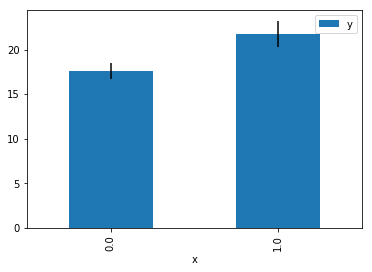

In [6]:
cvp_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

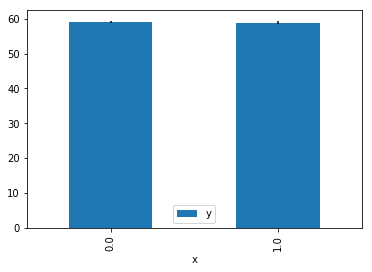

In [7]:
# Results for DBP
dbp_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

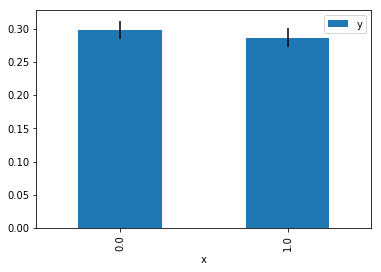

In [8]:
ratio_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

## Results for data_simple200

In [9]:
cvp_df, dbp_df, ratio_df = prep_data('../data/data_simple200.csv', pre_dpb_thres=45)

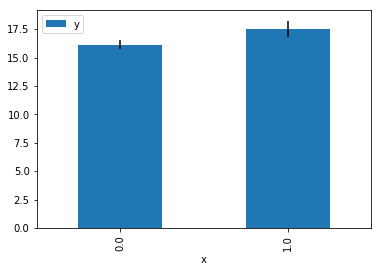

In [10]:
cvp_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

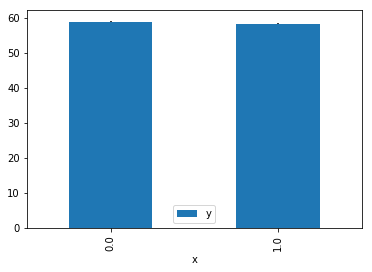

In [11]:
dbp_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

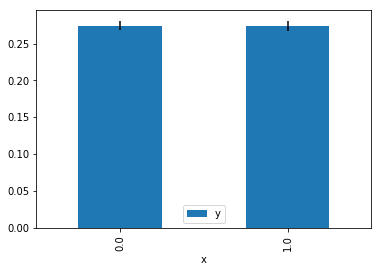

In [12]:
ratio_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

## Results for data100_limited

In [13]:
cvp_df, dbp_df, ratio_df = prep_data('../data/data_simple100_limited.csv', pre_dpb_thres=45)

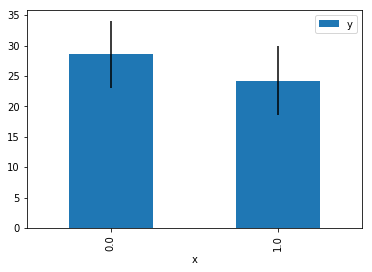

In [14]:
cvp_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

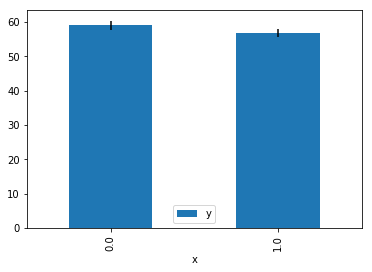

In [15]:
dbp_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

In [21]:
dbp_df.zmean(x='x', y='y', z=['z'], z_types={'z': 'c'}, bootstrap_samples=500, confidence_level=0.95)

,x,y,y_lower,y_upper
0,0.0,58.730646,58.140687,59.320605
1,1.0,58.298879,57.605636,58.992122


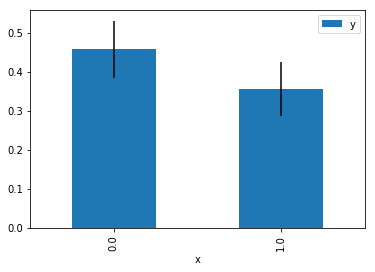

In [16]:
ratio_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

## Results for data200_limited

In [17]:
cvp_df, dbp_df, ratio_df = prep_data('../data/data_simple200_limited.csv', pre_dpb_thres=45)

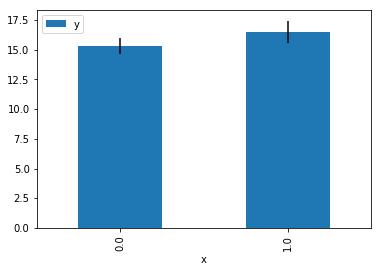

In [18]:
cvp_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

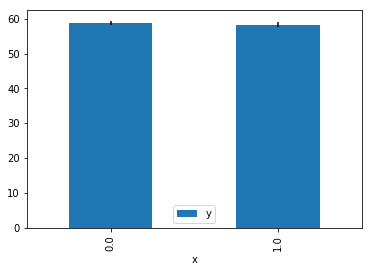

In [19]:
dbp_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)

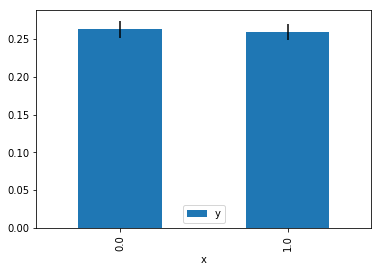

In [20]:
ratio_df.zplot(x='x', y='y', z_types={'z': 'c'}, z=['z'], kind='bar', bootstrap_samples=500)